In [ ]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.utils import np_utils
from keras.layers import Dense, LSTM, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
apt=pd.read_csv('./gangnam_apt_0918 (1).csv',encoding='cp949',index_col=0)

In [ ]:
apt

,년도,월,거래금액(만원),강북,강남,환율,국고채,생산자물가지수,주택담보대출금리,종합주가지수,건설기성액,인구
0,2009,1,89243.784232,17.000000,27.333333,1368.5,3.44,95.20,5.63,1156.37,6059915.0,569499
1,2009,2,83593.229167,24.500000,37.500000,1516.4,3.78,95.85,5.38,1139.75,6095776.0,569499
2,2009,3,89842.291667,22.400000,36.000000,1377.1,3.69,96.30,5.43,1140.45,6959886.0,569499
3,2009,4,90544.426938,33.500000,52.250000,1348.0,3.76,96.41,5.30,1322.10,7426011.0,569499
4,2009,5,91512.095238,37.000000,48.000000,1272.9,3.83,95.68,5.25,1400.50,7217349.0,569499
5,2009,6,92813.318573,43.000000,54.200000,1284.7,4.09,95.43,5.25,1395.24,8967909.0,569499
6,2009,7,90402.285298,54.500000,66.500000,1240.5,4.09,96.52,5.29,1460.03,6985397.0,569499
7,2009,8,87121.506207,61.600000,78.600000,1244.9,4.42,97.07,5.45,1577.91,6714786.0,569499
8,2009,9,90648.040404,60.750000,71.750000,1188.7,4.40,97.16,5.77,1659.45,8389224.0,569499
9,2009,10,92377.611570,40.750000,49.250000,1200.6,4.47,96.38,5.90,1630.61,7288796.0,569499


In [ ]:
apt['일']='01'

In [ ]:
apt.loc[(apt['월'] == 1),'월'] = '01'
apt.loc[(apt['월'] == 2),'월'] = '02'
apt.loc[(apt['월'] == 3),'월'] = '03'
apt.loc[(apt['월'] == 4),'월'] = '04'
apt.loc[(apt['월'] == 5),'월'] = '05'
apt.loc[(apt['월'] == 6),'월'] = '06'
apt.loc[(apt['월'] == 7),'월'] = '07'
apt.loc[(apt['월'] == 8),'월'] = '08'
apt.loc[(apt['월'] == 9),'월'] = '09'

In [ ]:
apt

,년도,월,거래금액(만원),강북,강남,환율,국고채,생산자물가지수,주택담보대출금리,종합주가지수,건설기성액,인구,일
0,2009,01,89243.784232,17.000000,27.333333,1368.5,3.44,95.20,5.63,1156.37,6059915.0,569499,01
1,2009,02,83593.229167,24.500000,37.500000,1516.4,3.78,95.85,5.38,1139.75,6095776.0,569499,01
2,2009,03,89842.291667,22.400000,36.000000,1377.1,3.69,96.30,5.43,1140.45,6959886.0,569499,01
3,2009,04,90544.426938,33.500000,52.250000,1348.0,3.76,96.41,5.30,1322.10,7426011.0,569499,01
4,2009,05,91512.095238,37.000000,48.000000,1272.9,3.83,95.68,5.25,1400.50,7217349.0,569499,01
5,2009,06,92813.318573,43.000000,54.200000,1284.7,4.09,95.43,5.25,1395.24,8967909.0,569499,01
6,2009,07,90402.285298,54.500000,66.500000,1240.5,4.09,96.52,5.29,1460.03,6985397.0,569499,01
7,2009,08,87121.506207,61.600000,78.600000,1244.9,4.42,97.07,5.45,1577.91,6714786.0,569499,01
8,2009,09,90648.040404,60.750000,71.750000,1188.7,4.40,97.16,5.77,1659.45,8389224.0,569499,01
9,2009,10,92377.611570,40.750000,49.250000,1200.6,4.47,96.38,5.90,1630.61,7288796.0,569499,01


In [ ]:
apt['년도']=apt['년도'].astype(str)
apt['월']=apt['월'].astype(str)
apt['일']=apt['일'].astype(str)

In [ ]:
apt['년월일'] = apt['년도'] + '-' + apt['월'] + '-' + apt['일']

In [ ]:
apt.drop(['년도','월','일'],axis=1,inplace=True)

In [ ]:
apt['년월일']=pd.to_datetime(apt['년월일'])

In [ ]:
apt.set_index('년월일',inplace=True)

In [ ]:
apt.head()

,거래금액(만원),강북,강남,환율,국고채,생산자물가지수,주택담보대출금리,종합주가지수,건설기성액,인구
년월일,,,,,,,,,,
2009-01-01,89243.784232,17.0,27.333333,1368.5,3.44,95.20,5.63,1156.37,6059915.0,569499
2009-02-01,83593.229167,24.5,37.500000,1516.4,3.78,95.85,5.38,1139.75,6095776.0,569499
2009-03-01,89842.291667,22.4,36.000000,1377.1,3.69,96.30,5.43,1140.45,6959886.0,569499
2009-04-01,90544.426938,33.5,52.250000,1348.0,3.76,96.41,5.30,1322.10,7426011.0,569499
2009-05-01,91512.095238,37.0,48.000000,1272.9,3.83,95.68,5.25,1400.50,7217349.0,569499


In [ ]:
apt.drop(['강북'],axis=1, inplace=True)

In [ ]:
y=[]
for i in [1,2,3,4,5,6,7,8,9]:
    tmp=(apt['인구'][((12*(i+1))-1)]-apt['인구'][12*i-1])/apt['인구'][12*i-1]
    y.append(tmp)
y

[0.013294140990589974,
 -0.00704767185956643,
 -0.005246045832220774,
 -0.0014824639427926814,
 0.02511455639266839,
 -0.0028897275840437677,
 -0.016536028602860287,
 -0.01937987205928619,
 -0.024238395015078816]

In [ ]:
apt.loc[(apt['인구'] == 569499),'인구']=0
apt.loc[(apt['인구'] == 577070),'인구']=0.013294140990589974
apt.loc[(apt['인구'] == 573003),'인구']=-0.00704767185956643
apt.loc[(apt['인구'] == 569997),'인구']=-0.005246045832220774
apt.loc[(apt['인구'] == 569152),'인구']=-0.0014824639427926814
apt.loc[(apt['인구'] == 583446),'인구']=0.02511455639266839
apt.loc[(apt['인구'] == 581760),'인구']=-0.0028897275840437677
apt.loc[(apt['인구'] == 572140),'인구']=-0.016536028602860287
apt.loc[(apt['인구'] == 561052),'인구']=-0.01937987205928619
apt.loc[(apt['인구'] == 547453),'인구']=-0.024238395015078816

In [ ]:
z=[]
for i in apt.index:
    tmp=apt['인구'][i]
    z.append(tmp)
len(z)

120

In [ ]:
apt

,거래금액(만원),강남,환율,국고채,생산자물가지수,주택담보대출금리,종합주가지수,건설기성액,인구
년월일,,,,,,,,,
2009-01-01,89243.784232,27.333333,1368.5,3.44,95.20,5.63,1156.37,6059915.0,0.000000
2009-02-01,83593.229167,37.500000,1516.4,3.78,95.85,5.38,1139.75,6095776.0,0.000000
2009-03-01,89842.291667,36.000000,1377.1,3.69,96.30,5.43,1140.45,6959886.0,0.000000
2009-04-01,90544.426938,52.250000,1348.0,3.76,96.41,5.30,1322.10,7426011.0,0.000000
2009-05-01,91512.095238,48.000000,1272.9,3.83,95.68,5.25,1400.50,7217349.0,0.000000
2009-06-01,92813.318573,54.200000,1284.7,4.09,95.43,5.25,1395.24,8967909.0,0.000000
2009-07-01,90402.285298,66.500000,1240.5,4.09,96.52,5.29,1460.03,6985397.0,0.000000
2009-08-01,87121.506207,78.600000,1244.9,4.42,97.07,5.45,1577.91,6714786.0,0.000000
2009-09-01,90648.040404,71.750000,1188.7,4.40,97.16,5.77,1659.45,8389224.0,0.000000


In [ ]:
a=[]
for i in range(120):
    if i < 119:
        tmp=(apt['거래금액(만원)'][i+1]-apt['거래금액(만원)'][i])/apt['거래금액(만원)'][i]
        a.append(tmp)
a

[-0.0633159509572794,
 0.07475560595393116,
 0.007815197698614188,
 0.010687220992876762,
 0.01421914045028683,
 -0.02597723378337935,
 -0.036290886681383326,
 0.04047834284188128,
 0.019080072315942116,
 -0.013343272752582304,
 0.036128696409769144,
 -0.028559690329247975,
 0.004206853872358837,
 -0.1169863083657067,
 0.026914774832042725,
 -0.03472775522673885,
 -0.07284996914602966,
 0.015377327515743614,
 0.10456707919632985,
 -0.06030580097845501,
 0.09220533459458591,
 0.03778861411793091,
 0.045492309115414714,
 -0.10197006295666507,
 -0.035122921647160604,
 0.06267213593908182,
 -0.0967585407775937,
 0.06098946921661174,
 0.02414362183992333,
 0.02819369167774816,
 -0.0773390982675772,
 0.14951204072378235,
 -0.06236900563594867,
 0.05604091370618001,
 -0.0576220615628077,
 -0.09409108212637433,
 0.049543464052916326,
 0.019615639637275813,
 -0.012056970158927365,
 0.10615426730757792,
 -0.16115548151215184,
 0.09429925590662067,
 0.030088684929464173,
 -0.021536412747202433,
 

In [ ]:
len(a)

119

In [ ]:
b=[0]+a
b

[0,
 -0.0633159509572794,
 0.07475560595393116,
 0.007815197698614188,
 0.010687220992876762,
 0.01421914045028683,
 -0.02597723378337935,
 -0.036290886681383326,
 0.04047834284188128,
 0.019080072315942116,
 -0.013343272752582304,
 0.036128696409769144,
 -0.028559690329247975,
 0.004206853872358837,
 -0.1169863083657067,
 0.026914774832042725,
 -0.03472775522673885,
 -0.07284996914602966,
 0.015377327515743614,
 0.10456707919632985,
 -0.06030580097845501,
 0.09220533459458591,
 0.03778861411793091,
 0.045492309115414714,
 -0.10197006295666507,
 -0.035122921647160604,
 0.06267213593908182,
 -0.0967585407775937,
 0.06098946921661174,
 0.02414362183992333,
 0.02819369167774816,
 -0.0773390982675772,
 0.14951204072378235,
 -0.06236900563594867,
 0.05604091370618001,
 -0.0576220615628077,
 -0.09409108212637433,
 0.049543464052916326,
 0.019615639637275813,
 -0.012056970158927365,
 0.10615426730757792,
 -0.16115548151215184,
 0.09429925590662067,
 0.030088684929464173,
 -0.02153641274720243

In [ ]:
c=[]
for i in range(120):
    if i < 119:
        tmp=(apt['강남'][i+1]-apt['강남'][i])/apt['강남'][i]
        c.append(tmp)
c

[0.37195121967951433,
 -0.04,
 0.4513888888888889,
 -0.08133971291866028,
 0.12916666666665874,
 0.22693726937270234,
 0.18195488721803071,
 -0.08715012722645198,
 -0.313588850174216,
 -0.3015228426395973,
 -0.040697674418600054,
 0.25757575757575757,
 -0.0963855421686747,
 -0.30666666666666664,
 -0.2403846153846154,
 -0.09873417721518822,
 -0.1432584269662937,
 -0.03278688524590164,
 -0.05084745762711865,
 0.21428571428571427,
 0.0,
 0.35294117647058826,
 0.25,
 0.19130434782608696,
 0.058394160583941604,
 -0.2,
 -0.29310344827586204,
 -0.09268292682926771,
 -0.18010752688172096,
 -0.06557377049180328,
 0.10877192982456806,
 -0.008438818354440738,
 -0.18297872357808187,
 -0.16015625000000425,
 0.09302325581395349,
 0.06382978723404255,
 -0.1,
 -0.08888888888888889,
 0.014634146341468476,
 0.12980769230768668,
 -0.23404255319148937,
 -0.06666666666666782,
 -0.13690476190476084,
 0.034482758620689655,
 0.13333333333333333,
 0.029411764705882353,
 -0.03999999999999489,
 0.249999999999993

In [ ]:
len(c)

119

In [ ]:
d=[0]+c
d

[0,
 0.37195121967951433,
 -0.04,
 0.4513888888888889,
 -0.08133971291866028,
 0.12916666666665874,
 0.22693726937270234,
 0.18195488721803071,
 -0.08715012722645198,
 -0.313588850174216,
 -0.3015228426395973,
 -0.040697674418600054,
 0.25757575757575757,
 -0.0963855421686747,
 -0.30666666666666664,
 -0.2403846153846154,
 -0.09873417721518822,
 -0.1432584269662937,
 -0.03278688524590164,
 -0.05084745762711865,
 0.21428571428571427,
 0.0,
 0.35294117647058826,
 0.25,
 0.19130434782608696,
 0.058394160583941604,
 -0.2,
 -0.29310344827586204,
 -0.09268292682926771,
 -0.18010752688172096,
 -0.06557377049180328,
 0.10877192982456806,
 -0.008438818354440738,
 -0.18297872357808187,
 -0.16015625000000425,
 0.09302325581395349,
 0.06382978723404255,
 -0.1,
 -0.08888888888888889,
 0.014634146341468476,
 0.12980769230768668,
 -0.23404255319148937,
 -0.06666666666666782,
 -0.13690476190476084,
 0.034482758620689655,
 0.13333333333333333,
 0.029411764705882353,
 -0.03999999999999489,
 0.24999999999

In [ ]:
e=[]
for i in range(120):
    if i < 119:
        tmp=(apt['주택담보대출금리'][i+1]-apt['주택담보대출금리'][i])/apt['주택담보대출금리'][i]
        e.append(tmp)
e

[-0.04440497335701609,
 0.009293680297376497,
 -0.02394106813993982,
 -0.009433962264165352,
 0.0,
 0.007619047619041874,
 0.030245746691863595,
 0.058715596330286494,
 0.022530329289433045,
 -0.005084745762718669,
 0.00511073253834206,
 -0.0033898305084701153,
 -0.022108843537426027,
 -0.04869565217390938,
 -0.07312614259597769,
 -0.05719921104537254,
 -0.03347280334727566,
 0.017316017316019044,
 0.023404255319140817,
 -0.0020790020790009377,
 -0.012499999999994604,
 -0.018987341772142473,
 0.004301075268815346,
 0.027837259100636606,
 0.012499999999987847,
 0.00617283950618665,
 -0.00204498977505325,
 0.004098360655736331,
 -0.006122448979598221,
 0.006160164271058433,
 0.014285714285712077,
 0.006036217303818673,
 0.0019999999999988916,
 0.0,
 -0.011976047904184816,
 0.02222222222221193,
 -0.007905138339919234,
 -0.0039840637450173685,
 -0.011999999999993526,
 -0.01821862348178878,
 -0.01855670103092801,
 -0.025210084033614244,
 -0.04956896551723813,
 -0.027210884353745107,
 -0.013

In [ ]:
len(e)

119

In [ ]:
f=[0]+e
f

[0,
 -0.04440497335701609,
 0.009293680297376497,
 -0.02394106813993982,
 -0.009433962264165352,
 0.0,
 0.007619047619041874,
 0.030245746691863595,
 0.058715596330286494,
 0.022530329289433045,
 -0.005084745762718669,
 0.00511073253834206,
 -0.0033898305084701153,
 -0.022108843537426027,
 -0.04869565217390938,
 -0.07312614259597769,
 -0.05719921104537254,
 -0.03347280334727566,
 0.017316017316019044,
 0.023404255319140817,
 -0.0020790020790009377,
 -0.012499999999994604,
 -0.018987341772142473,
 0.004301075268815346,
 0.027837259100636606,
 0.012499999999987847,
 0.00617283950618665,
 -0.00204498977505325,
 0.004098360655736331,
 -0.006122448979598221,
 0.006160164271058433,
 0.014285714285712077,
 0.006036217303818673,
 0.0019999999999988916,
 0.0,
 -0.011976047904184816,
 0.02222222222221193,
 -0.007905138339919234,
 -0.0039840637450173685,
 -0.011999999999993526,
 -0.01821862348178878,
 -0.01855670103092801,
 -0.025210084033614244,
 -0.04956896551723813,
 -0.027210884353745107,
 -0

In [ ]:
g=[]
for i in range(120):
    if i < 119:
        tmp=(apt['환율'][i+1]-apt['환율'][i])/apt['환율'][i]
        g.append(tmp)
g

[0.10807453416150022,
 -0.09186230546031819,
 -0.02113136300921187,
 -0.05571216617209748,
 0.009270170476838898,
 -0.03440491943642998,
 0.003546956872241294,
 -0.04514418828822563,
 0.01001093631698404,
 -0.02765284024654586,
 0.00017132088401112624,
 -0.00950668036998386,
 0.0016428880242126329,
 -0.023825966850834893,
 -0.013530244074986555,
 0.07593007619901618,
 0.008415264122641207,
 -0.01908617698090854,
 0.0016004043126693023,
 -0.03960978891599011,
 -0.013485113835383979,
 0.027250133143984764,
 -0.01589907543419245,
 -0.021599789270360225,
 0.012204971731138305,
 -0.018352690841387374,
 -0.0315209537572356,
 0.007740371164791905,
 -0.002313529520637312,
 -0.023652722381972906,
 0.01814554436634135,
 0.10058785107772039,
 -0.0635862653666808,
 0.04146672702579896,
 0.0026080153003550564,
 -0.024538281453215575,
 0.0013333333333333333,
 0.010031069684859941,
 -0.00316400070310181,
 0.03844119202961452,
 -0.020376974019355325,
 -0.015253943491071545,
 -0.001408202781198012,
 -0

In [ ]:
h=[0]+g
h

[0,
 0.10807453416150022,
 -0.09186230546031819,
 -0.02113136300921187,
 -0.05571216617209748,
 0.009270170476838898,
 -0.03440491943642998,
 0.003546956872241294,
 -0.04514418828822563,
 0.01001093631698404,
 -0.02765284024654586,
 0.00017132088401112624,
 -0.00950668036998386,
 0.0016428880242126329,
 -0.023825966850834893,
 -0.013530244074986555,
 0.07593007619901618,
 0.008415264122641207,
 -0.01908617698090854,
 0.0016004043126693023,
 -0.03960978891599011,
 -0.013485113835383979,
 0.027250133143984764,
 -0.01589907543419245,
 -0.021599789270360225,
 0.012204971731138305,
 -0.018352690841387374,
 -0.0315209537572356,
 0.007740371164791905,
 -0.002313529520637312,
 -0.023652722381972906,
 0.01814554436634135,
 0.10058785107772039,
 -0.0635862653666808,
 0.04146672702579896,
 0.0026080153003550564,
 -0.024538281453215575,
 0.0013333333333333333,
 0.010031069684859941,
 -0.00316400070310181,
 0.03844119202961452,
 -0.020376974019355325,
 -0.015253943491071545,
 -0.001408202781198012,

In [ ]:
j=[]
for i in range(120):
    if i < 119:
        tmp=(apt['국고채'][i+1]-apt['국고채'][i])/apt['국고채'][i]
        j.append(tmp)
j

[0.09883720930230691,
 -0.023809523809506884,
 0.0189701897019023,
 0.018617021276571895,
 0.06788511749348912,
 -4.994646369951763e-15,
 0.08068459657702423,
 -0.004524886877828917,
 0.015909090909086387,
 -0.03355704697986629,
 -0.01851851851852072,
 0.011792452830180863,
 -0.023310023310010527,
 -0.05966587112171932,
 -0.043147208121835916,
 -0.018567639257291844,
 0.013513513513513466,
 0.034666666666665576,
 -0.03865979381442946,
 -0.0670241286863269,
 -0.06896551724137956,
 0.04938271604939127,
 -0.04411764705883374,
 0.1415384615384692,
 0.0619946091644233,
 -0.05076142131980374,
 -2.374808608823859e-16,
 -0.02139037433155529,
 -0.002732240437160239,
 0.032876712328767904,
 -0.05305039787797726,
 -0.03361344537815018,
 0.005797101449276499,
 -0.02305475504323664,
 -0.008849557522118363,
 0.002976190476189481,
 0.017804154302666006,
 0.03498542274052428,
 -0.014084507042249771,
 -0.03428571428571546,
 -0.02662721893490808,
 -0.08510638297872695,
 -0.05980066445182593,
 -0.0070671

In [ ]:
k=[0]+j
k

[0,
 0.09883720930230691,
 -0.023809523809506884,
 0.0189701897019023,
 0.018617021276571895,
 0.06788511749348912,
 -4.994646369951763e-15,
 0.08068459657702423,
 -0.004524886877828917,
 0.015909090909086387,
 -0.03355704697986629,
 -0.01851851851852072,
 0.011792452830180863,
 -0.023310023310010527,
 -0.05966587112171932,
 -0.043147208121835916,
 -0.018567639257291844,
 0.013513513513513466,
 0.034666666666665576,
 -0.03865979381442946,
 -0.0670241286863269,
 -0.06896551724137956,
 0.04938271604939127,
 -0.04411764705883374,
 0.1415384615384692,
 0.0619946091644233,
 -0.05076142131980374,
 -2.374808608823859e-16,
 -0.02139037433155529,
 -0.002732240437160239,
 0.032876712328767904,
 -0.05305039787797726,
 -0.03361344537815018,
 0.005797101449276499,
 -0.02305475504323664,
 -0.008849557522118363,
 0.002976190476189481,
 0.017804154302666006,
 0.03498542274052428,
 -0.014084507042249771,
 -0.03428571428571546,
 -0.02662721893490808,
 -0.08510638297872695,
 -0.05980066445182593,
 -0.007

In [ ]:
l=[]
for i in range(120):
    if i < 119:
        tmp=(apt['생산자물가지수'][i+1]-apt['생산자물가지수'][i])/apt['생산자물가지수'][i]
        l.append(tmp)
l

[0.006827731092433188,
 0.0046948356807709635,
 0.00114226375909532,
 -0.007571828648497584,
 -0.0026128762541923283,
 0.011421984700822759,
 0.005698300870302197,
 0.0009271659627154096,
 -0.008027995059705077,
 0.003527702842914681,
 0.004962779156327576,
 0.004423868312750686,
 0.0017412680528526327,
 0.004601226993869877,
 0.00732824427480857,
 0.0084874204304325,
 0.001102093978559401,
 0.0025020016012817395,
 0.002994908655286697,
 0.0057728675226395975,
 0.003661553686287364,
 0.0035495957404880854,
 0.009137355079585227,
 0.015480479018611111,
 0.007478427612656697,
 0.011990864103530622,
 0.006112469437657138,
 0.0030844004112463175,
 -0.0022363026462821527,
 0.0013074336944320732,
 0.0013057265435538474,
 0.0007451564828533079,
 -0.0009307520476489007,
 -0.0032606670393112262,
 0.001028133470407426,
 0.0051353874883339765,
 0.0068741291221529775,
 0.004889749976932019,
 0.0004590525156166342,
 -0.0055061025970498155,
 -0.012180492756298747,
 -0.004390471742174298,
 0.00619253

In [ ]:
m=[0]+l
m

[0,
 0.006827731092433188,
 0.0046948356807709635,
 0.00114226375909532,
 -0.007571828648497584,
 -0.0026128762541923283,
 0.011421984700822759,
 0.005698300870302197,
 0.0009271659627154096,
 -0.008027995059705077,
 0.003527702842914681,
 0.004962779156327576,
 0.004423868312750686,
 0.0017412680528526327,
 0.004601226993869877,
 0.00732824427480857,
 0.0084874204304325,
 0.001102093978559401,
 0.0025020016012817395,
 0.002994908655286697,
 0.0057728675226395975,
 0.003661553686287364,
 0.0035495957404880854,
 0.009137355079585227,
 0.015480479018611111,
 0.007478427612656697,
 0.011990864103530622,
 0.006112469437657138,
 0.0030844004112463175,
 -0.0022363026462821527,
 0.0013074336944320732,
 0.0013057265435538474,
 0.0007451564828533079,
 -0.0009307520476489007,
 -0.0032606670393112262,
 0.001028133470407426,
 0.0051353874883339765,
 0.0068741291221529775,
 0.004889749976932019,
 0.0004590525156166342,
 -0.0055061025970498155,
 -0.012180492756298747,
 -0.004390471742174298,
 0.0061

In [ ]:
n=[]
for i in range(120):
    if i < 119:
        tmp=(apt['종합주가지수'][i+1]-apt['종합주가지수'][i])/apt['종합주가지수'][i]
        n.append(tmp)
n

[-0.014372562415140554,
 0.0006141697740675163,
 0.1592792318821442,
 0.05929959912262098,
 -0.0037558014994701528,
 0.04643645537687317,
 0.08073806702600698,
 0.051675951099863136,
 -0.01737925216185929,
 -0.028909426533628324,
 0.0398933986750742,
 0.021571199533590837,
 -0.04946021781518696,
 0.041614549457141936,
 0.03890123086160146,
 -0.04738512041334238,
 0.026475762907242035,
 0.02315684953366819,
 0.017942141503765167,
 0.030399845645737413,
 0.0407269723254791,
 0.01852675027781994,
 0.04041647832661326,
 0.04449937578027358,
 -0.042426647415150016,
 -9.985670562404184e-05,
 0.07512970184803325,
 -0.014518398796174399,
 -0.022258668061655988,
 0.03635329502950179,
 -0.13053124098863297,
 -0.04197046126852142,
 0.019503615399645895,
 0.018029662409352425,
 0.0023832580159240517,
 0.014909592481879638,
 0.05934394847197565,
 0.010073730924553943,
 -0.01358597614917141,
 -0.054896989859314814,
 -0.02001219285922076,
 -0.011819755490641883,
 0.05045025318188205,
 0.0220854547633

In [ ]:
o=[0]+n
o

[0,
 -0.014372562415140554,
 0.0006141697740675163,
 0.1592792318821442,
 0.05929959912262098,
 -0.0037558014994701528,
 0.04643645537687317,
 0.08073806702600698,
 0.051675951099863136,
 -0.01737925216185929,
 -0.028909426533628324,
 0.0398933986750742,
 0.021571199533590837,
 -0.04946021781518696,
 0.041614549457141936,
 0.03890123086160146,
 -0.04738512041334238,
 0.026475762907242035,
 0.02315684953366819,
 0.017942141503765167,
 0.030399845645737413,
 0.0407269723254791,
 0.01852675027781994,
 0.04041647832661326,
 0.04449937578027358,
 -0.042426647415150016,
 -9.985670562404184e-05,
 0.07512970184803325,
 -0.014518398796174399,
 -0.022258668061655988,
 0.03635329502950179,
 -0.13053124098863297,
 -0.04197046126852142,
 0.019503615399645895,
 0.018029662409352425,
 0.0023832580159240517,
 0.014909592481879638,
 0.05934394847197565,
 0.010073730924553943,
 -0.01358597614917141,
 -0.054896989859314814,
 -0.02001219285922076,
 -0.011819755490641883,
 0.05045025318188205,
 0.022085454

In [ ]:
p=[]
for i in range(120):
    if i < 119:
        tmp=(apt['건설기성액'][i+1]-apt['건설기성액'][i])/apt['건설기성액'][i]
        p.append(tmp)
p

[0.0059177397702773055,
 0.14175553694886425,
 0.06697307973147835,
 -0.028098800284567314,
 0.24254889156669576,
 -0.22106736364073276,
 -0.03873953048051528,
 0.249365802573604,
 -0.13117160776729767,
 0.10872646181893415,
 0.19194766275297195,
 -0.32513882221620555,
 -0.0539367588349094,
 0.25113025198879474,
 -0.045388098039144335,
 0.05372175589864458,
 0.1627823715912528,
 -0.17220863959977123,
 -0.04069647180105331,
 0.03846639818667564,
 -0.006072848036376185,
 0.08656882698530426,
 0.3021624408941015,
 -0.40723139042824347,
 -0.13836802482755275,
 0.4556821257947221,
 -0.07639444912460036,
 0.03845071951470326,
 0.26937742719604346,
 -0.28509668080647166,
 0.021083595255143528,
 0.1270338199164453,
 0.02428661876975503,
 -0.012784330709927407,
 0.417382224080442,
 -0.4796611446033241,
 0.04109610074324956,
 0.23355906863845768,
 -0.0806030712124078,
 0.06762663025952798,
 0.1303490211540538,
 -0.1480082442113328,
 -0.06464934354765639,
 0.17478392533315182,
 -0.050342396528688

In [ ]:
q=[0]+p
q

[0,
 0.0059177397702773055,
 0.14175553694886425,
 0.06697307973147835,
 -0.028098800284567314,
 0.24254889156669576,
 -0.22106736364073276,
 -0.03873953048051528,
 0.249365802573604,
 -0.13117160776729767,
 0.10872646181893415,
 0.19194766275297195,
 -0.32513882221620555,
 -0.0539367588349094,
 0.25113025198879474,
 -0.045388098039144335,
 0.05372175589864458,
 0.1627823715912528,
 -0.17220863959977123,
 -0.04069647180105331,
 0.03846639818667564,
 -0.006072848036376185,
 0.08656882698530426,
 0.3021624408941015,
 -0.40723139042824347,
 -0.13836802482755275,
 0.4556821257947221,
 -0.07639444912460036,
 0.03845071951470326,
 0.26937742719604346,
 -0.28509668080647166,
 0.021083595255143528,
 0.1270338199164453,
 0.02428661876975503,
 -0.012784330709927407,
 0.417382224080442,
 -0.4796611446033241,
 0.04109610074324956,
 0.23355906863845768,
 -0.0806030712124078,
 0.06762663025952798,
 0.1303490211540538,
 -0.1480082442113328,
 -0.06464934354765639,
 0.17478392533315182,
 -0.05034239652

In [ ]:
apt_new=pd.DataFrame({'거래금액':b,
                      '강남':d,
                      '주택담보대출금리':f,
                      '국고채':k,
                      '생산자물가지수':m,
                      '종합주가지수':o,
                      '인구':z}
                    ,index=apt.index)

In [ ]:
apt=apt_new

In [ ]:
import platform
from matplotlib import font_manager, rc

path="c:/Windows/Fonts/malgun.ttf"
if platform.system()=='Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

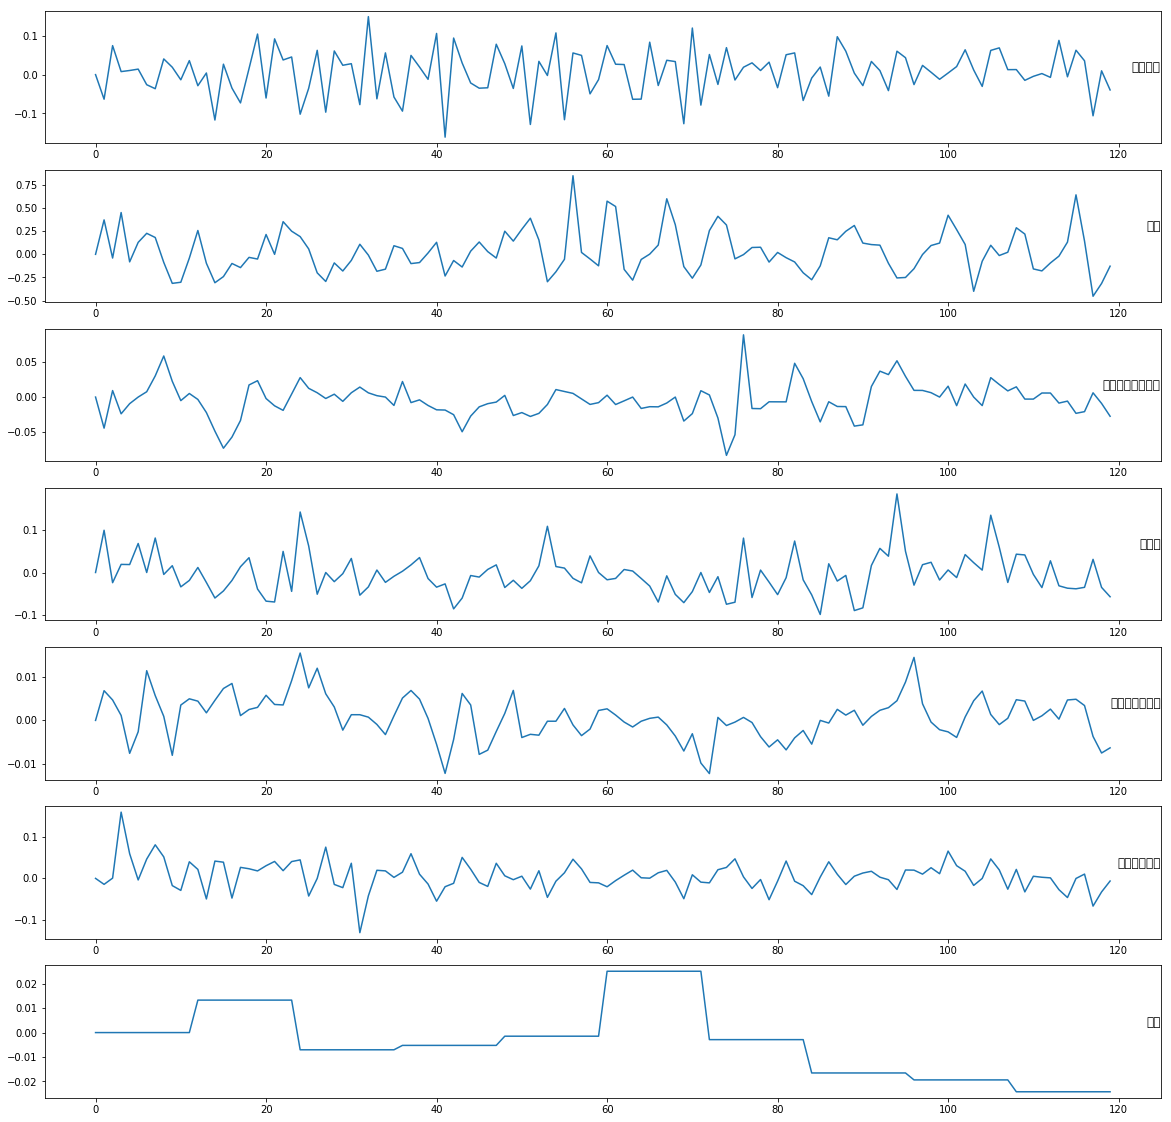

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
values = apt.values
# specify columns to plot
groups = [0, 1, 2,3,4,5,6]
i = 1
# plot each column
pyplot.figure(figsize=(20,20))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(apt.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [ ]:
np.random.seed(5)

In [ ]:
apt

,거래금액,강남,주택담보대출금리,국고채,생산자물가지수,종합주가지수,인구
년월일,,,,,,,
2009-01-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2009-02-01,-0.063316,0.371951,-4.440497e-02,9.883721e-02,6.827731e-03,-0.014373,0.000000
2009-03-01,0.074756,-0.040000,9.293680e-03,-2.380952e-02,4.694836e-03,0.000614,0.000000
2009-04-01,0.007815,0.451389,-2.394107e-02,1.897019e-02,1.142264e-03,0.159279,0.000000
2009-05-01,0.010687,-0.081340,-9.433962e-03,1.861702e-02,-7.571829e-03,0.059300,0.000000
2009-06-01,0.014219,0.129167,0.000000e+00,6.788512e-02,-2.612876e-03,-0.003756,0.000000
2009-07-01,-0.025977,0.226937,7.619048e-03,-4.994646e-15,1.142198e-02,0.046436,0.000000
2009-08-01,-0.036291,0.181955,3.024575e-02,8.068460e-02,5.698301e-03,0.080738,0.000000
2009-09-01,0.040478,-0.087150,5.871560e-02,-4.524887e-03,9.271660e-04,0.051676,0.000000


In [ ]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [ ]:
values = apt.values

In [ ]:
values = values.astype('float32')

In [ ]:
len(values)

120

In [ ]:
values

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-6.33159503e-02,  3.71951222e-01, -4.44049723e-02,
         9.88372117e-02,  6.82773115e-03, -1.43725621e-02,
         0.00000000e+00],
       [ 7.47556090e-02, -3.99999991e-02,  9.29368008e-03,
        -2.38095243e-02,  4.69483575e-03,  6.14169752e-04,
         0.00000000e+00],
       [ 7.81519804e-03,  4.51388896e-01, -2.39410680e-02,
         1.89701896e-02,  1.14226376e-03,  1.59279227e-01,
         0.00000000e+00],
       [ 1.06872208e-02, -8.13397095e-02, -9.43396240e-03,
         1.86170209e-02, -7.57182855e-03,  5.92995994e-02,
         0.00000000e+00],
       [ 1.42191406e-02,  1.29166663e-01,  0.00000000e+00,
         6.78851157e-02, -2.61287624e-03, -3.75580159e-03,
         0.00000000e+00],
       [-2.59772334e-02,  2.26937264e-01,  7.61904754e-03,
        -4.99464624e-15,  1.14219850e-02,  4.64364551e-02,
         0.0000000

In [ ]:
def seq2dataset(apt, window_size):
    dataset_X = []
    dataset_Y = []

    
    for i in range(len(apt)-2*window_size+1):
        window=apt[i:(i+2*window_size+1)]
        sample=window[:window_size]
        dataset_X.append(sample)
        dataset_y = []
        for i in range(12):
            tmp=window[window_size:][i][0]
            dataset_y.append(tmp)
        dataset_Y.append(dataset_y)
            
    return np.array(dataset_X), np.array(dataset_Y)

In [ ]:
x_train, y_train = seq2dataset(values, window_size = 12)

In [ ]:
apt

,거래금액,강남,주택담보대출금리,국고채,생산자물가지수,종합주가지수,인구
년월일,,,,,,,
2009-01-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2009-02-01,-0.063316,0.371951,-4.440497e-02,9.883721e-02,6.827731e-03,-0.014373,0.000000
2009-03-01,0.074756,-0.040000,9.293680e-03,-2.380952e-02,4.694836e-03,0.000614,0.000000
2009-04-01,0.007815,0.451389,-2.394107e-02,1.897019e-02,1.142264e-03,0.159279,0.000000
2009-05-01,0.010687,-0.081340,-9.433962e-03,1.861702e-02,-7.571829e-03,0.059300,0.000000
2009-06-01,0.014219,0.129167,0.000000e+00,6.788512e-02,-2.612876e-03,-0.003756,0.000000
2009-07-01,-0.025977,0.226937,7.619048e-03,-4.994646e-15,1.142198e-02,0.046436,0.000000
2009-08-01,-0.036291,0.181955,3.024575e-02,8.068460e-02,5.698301e-03,0.080738,0.000000
2009-09-01,0.040478,-0.087150,5.871560e-02,-4.524887e-03,9.271660e-04,0.051676,0.000000


In [ ]:
len(x_train)

97

In [ ]:
len(y_train)

97

In [ ]:
x_train

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.33159503e-02,  3.71951222e-01, -4.44049723e-02, ...,
          6.82773115e-03, -1.43725621e-02,  0.00000000e+00],
        [ 7.47556090e-02, -3.99999991e-02,  9.29368008e-03, ...,
          4.69483575e-03,  6.14169752e-04,  0.00000000e+00],
        ...,
        [ 1.90800726e-02, -3.13588858e-01,  2.25303285e-02, ...,
         -8.02799501e-03, -1.73792522e-02,  0.00000000e+00],
        [-1.33432727e-02, -3.01522851e-01, -5.08474559e-03, ...,
          3.52770276e-03, -2.89094262e-02,  0.00000000e+00],
        [ 3.61286961e-02, -4.06976752e-02,  5.11073275e-03, ...,
          4.96277912e-03,  3.98933999e-02,  0.00000000e+00]],

       [[-6.33159503e-02,  3.71951222e-01, -4.44049723e-02, ...,
          6.82773115e-03, -1.43725621e-02,  0.00000000e+00],
        [ 7.47556090e-02, -3.99999991e-02,  9.29368008e-03, ...,
          4.69483575e-03,  6.14169752e

In [ ]:
apt

,거래금액,강남,주택담보대출금리,국고채,생산자물가지수,종합주가지수,인구
년월일,,,,,,,
2009-01-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2009-02-01,-0.063316,0.371951,-4.440497e-02,9.883721e-02,6.827731e-03,-0.014373,0.000000
2009-03-01,0.074756,-0.040000,9.293680e-03,-2.380952e-02,4.694836e-03,0.000614,0.000000
2009-04-01,0.007815,0.451389,-2.394107e-02,1.897019e-02,1.142264e-03,0.159279,0.000000
2009-05-01,0.010687,-0.081340,-9.433962e-03,1.861702e-02,-7.571829e-03,0.059300,0.000000
2009-06-01,0.014219,0.129167,0.000000e+00,6.788512e-02,-2.612876e-03,-0.003756,0.000000
2009-07-01,-0.025977,0.226937,7.619048e-03,-4.994646e-15,1.142198e-02,0.046436,0.000000
2009-08-01,-0.036291,0.181955,3.024575e-02,8.068460e-02,5.698301e-03,0.080738,0.000000
2009-09-01,0.040478,-0.087150,5.871560e-02,-4.524887e-03,9.271660e-04,0.051676,0.000000


In [ ]:
y_train

array([[-0.02855969,  0.00420685, -0.11698631, ...,  0.09220534,
         0.03778861,  0.04549231],
       [ 0.00420685, -0.11698631,  0.02691478, ...,  0.03778861,
         0.04549231, -0.10197006],
       [-0.11698631,  0.02691478, -0.03472776, ...,  0.04549231,
        -0.10197006, -0.03512292],
       ...,
       [ 0.0689759 ,  0.01282838,  0.01302635, ...,  0.06293301,
         0.03571244, -0.10613032],
       [ 0.01282838,  0.01302635, -0.01470559, ...,  0.03571244,
        -0.10613032,  0.00982255],
       [ 0.01302635, -0.01470559, -0.00440043, ..., -0.10613032,
         0.00982255, -0.03947542]], dtype=float32)

In [ ]:
x_test=np.array(x_train[96])

In [ ]:
x_train=np.array(x_train[:96])

In [ ]:
y_test=np.array(y_train[96])

In [ ]:
y_train=np.array(y_train[:96])

In [ ]:
len(x_train)

96

In [ ]:
len(y_train)

96

In [ ]:
train_x = np.reshape(x_train, (x_train.shape[0], 12, 7))

In [ ]:
test_x = np.reshape(x_test, (1, 12, 7))

In [ ]:
model = Sequential()
model.add(LSTM(200, batch_input_shape=(1, 12, 7), stateful=True, return_sequences=True))
model.add(LSTM(150, stateful=True, return_sequences=True))
model.add(LSTM(50, stateful=True, return_sequences=False))
model.add(Dense(12))
model.compile(loss='mse', optimizer='adam')

In [ ]:
num_epochs =600

In [ ]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [ ]:
history = LossHistory() # 손실 이력 객체 생성
history.init()

In [ ]:
for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(train_x , y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()

epochs : 0
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 5s - loss: 0.0037
epochs : 1
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 2
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 3
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 4
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 5
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 6
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 7
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 8
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 9
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 10
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 11
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 12
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 13
Epoch 1/1
 - 3s - loss: 0.0037
epochs : 14
Epoch 1/1
 - 3s - loss: 0.0036
epochs : 15
Epoch 1/1
 - 3s - loss: 0.0036
epochs : 16
Epoch 1/1
 - 3s - loss: 0.0036
epochs : 17
Epoch 1/1
 - 3s - loss: 0.0036
epochs : 18
Epoch 1/1
 - 3s - loss: 0.0036
epochs : 19
Epoch 1/1
 - 3s - loss: 0.0036
epochs : 20
Epoch 1/1
 - 3s - loss: 0.0036
epochs : 21
Epoch 1/1
 - 3s - loss: 0.0036
epochs : 22
Epoc

In [ ]:
y_test

array([ 0.01302635, -0.01470559, -0.00440043,  0.00275077, -0.00706026,
        0.0882618 , -0.00556248,  0.06293301,  0.03571244, -0.10613032,
        0.00982255, -0.03947542], dtype=float32)

In [ ]:
pred=pred.reshape(pred

TypeError: ignored

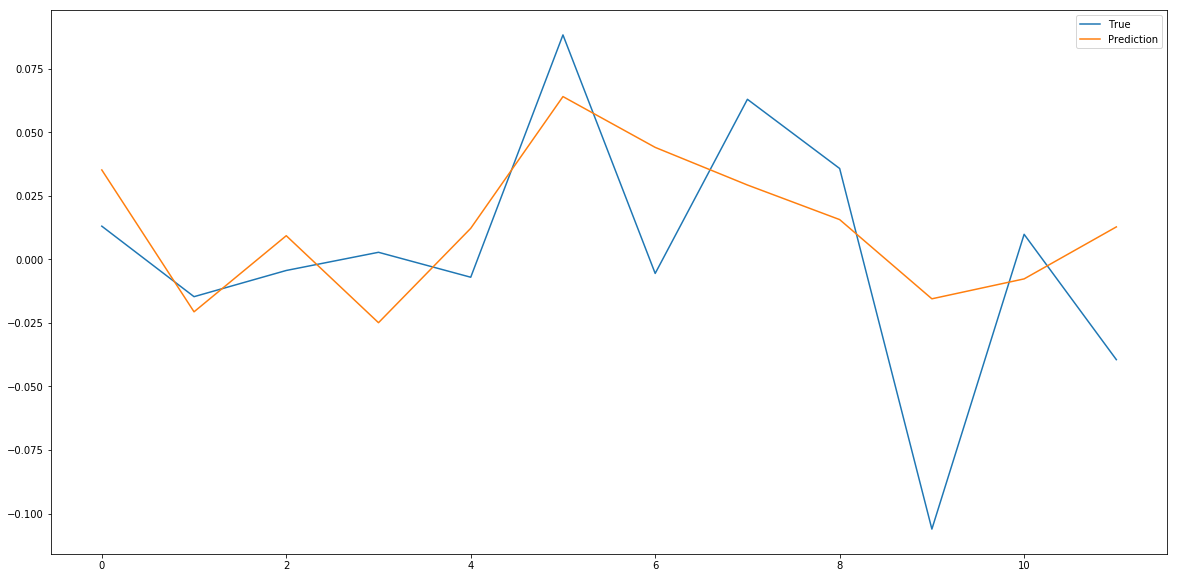

In [ ]:
#from keras.models import load_model model_call = load_model('./LSTM_1000.h5')

pred = model.predict(test_x, batch_size=1)
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred.reshape(12,-1), label='Prediction')
ax.legend()
plt.show()